In [1]:
#Read in file names and paths from the input directory
from os import walk
import os

filePath = 'input'
f = {}
for (dirpath, dirnames, filenames) in walk(filePath):
    if filenames:
        f[dirpath.rsplit('/', 1)[-1]] = list(os.path.join(dirpath, x) for x in filenames)
    
f

{'dry': ['input/dry/1088131773.CSV',
  'input/dry/1910189788.CSV',
  'input/dry/530759577.CSV',
  'input/dry/78520028.CSV',
  'input/dry/1780329192.CSV',
  'input/dry/1833935907.CSV',
  'input/dry/1610930929.CSV',
  'input/dry/213951127.CSV',
  'input/dry/954500386.CSV',
  'input/dry/2083478664.CSV',
  'input/dry/1689595608.CSV',
  'input/dry/1894789.CSV',
  'input/dry/1573713973.CSV',
  'input/dry/1409536457.CSV',
  'input/dry/1361302372.CSV',
  'input/dry/415107748.CSV',
  'input/dry/1875995420.CSV',
  'input/dry/558906994.CSV',
  'input/dry/200914295.CSV',
  'input/dry/69676054.CSV',
  'input/dry/2013933090.CSV',
  'input/dry/2037605477.CSV',
  'input/dry/23004232.CSV',
  'input/dry/871217096.CSV',
  'input/dry/1472076867.CSV',
  'input/dry/1598104040.CSV',
  'input/dry/916165555.CSV',
  'input/dry/667861474.CSV',
  'input/dry/973161134.CSV',
  'input/dry/1868626861.CSV',
  'input/dry/763918903.CSV',
  'input/dry/1894775098.CSV',
  'input/dry/1584842272.CSV',
  'input/dry/866511193.

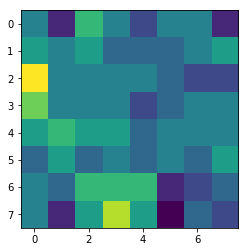

In [2]:
#Read in CSV files
import pandas as pd

data = []
labels = []
label_names = []

index = 0
for key in f:
    for fileName in f[key]:
        #read csv
        df = pd.read_csv(fileName, header=None, usecols=lambda x: x < 64)
        #add to data
        data.append(df.values[0])
        #add label
        labels.append(index)
    #add label name    
    label_names.append(key)
    index += 1

#Print test images
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(data[0].reshape((8,8)))

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,19.5,19.25,20.5,20.0,19.5,20.0,19.75,19.5,19.75,19.75,...,18.25,18.5,19.25,20.0,20.0,18.75,18.75,18.25,18.25,18.75


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler_model = MinMaxScaler()
scaler_model.fit(data)
data = scaler_model.transform(data)

In [5]:
print(data.shape)
data

(183, 64)


array([[0.67647059, 0.64864865, 0.75757576, ..., 0.63888889, 0.64864865,
        0.67567568],
       [0.79411765, 0.67567568, 0.72727273, ..., 0.63888889, 0.59459459,
        0.59459459],
       [0.55882353, 0.54054054, 0.51515152, ..., 0.47222222, 0.40540541,
        0.45945946],
       ...,
       [0.52941176, 0.54054054, 0.48484848, ..., 0.52777778, 0.48648649,
        0.56756757],
       [0.38235294, 0.35135135, 0.39393939, ..., 0.47222222, 0.40540541,
        0.48648649],
       [0.70588235, 0.72972973, 0.84848485, ..., 0.63888889, 0.56756757,
        0.67567568]])

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.15, random_state=42)

X_train = np.array(X_train);
y_train = np.array(y_train);
X_test = np.array(X_test);
y_test = np.array(y_test);



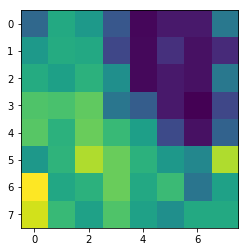

In [7]:
plt.imshow(X_train[0].reshape((8,8)))

In [8]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = index
resnet_weights_path = filePath + '/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(Dropout(0.05));
# my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
#my_new_model.add(Dense(64, activation='relu'))
my_new_model.add(Dense(32, activation='relu'))
my_new_model.add(Dropout(0.1));
my_new_model.add(Dense(16, activation='relu'))
my_new_model.add(Dropout(0.1));
my_new_model.add(Dense(8, activation='relu'))
my_new_model.add(Dropout(0.1));
my_new_model.add(Dense(4, activation='relu'))
my_new_model.add(Dropout(0.1));
# my_new_model.add(Dense(16, activation='relu'))
# my_new_model.add(Dropout(0.2));
# my_new_model.add(Dense(8, activation='relu'))
# my_new_model.add(Dense(4, activation='relu'))
# my_new_model.add(Dense(4, activation='relu'))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
# my_new_model.layers[0].trainable = False

In [9]:
from tensorflow.python.keras import optimizers

sgd = optimizers.SGD(lr=0.001, clipnorm=1.)
my_new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:

#data
my_new_model.fit(
        X_train, y_train,
#         validation_split=0.1,
        validation_data=(X_test, y_test),
        validation_steps=10,
        steps_per_epoch=10,
        epochs=5000)

Epoch 1/5000
10/10 [==============================] - 0s 32ms/step - loss: 0.7143 - acc: 0.3729 - val_loss: 0.6946 - val_acc: 0.4643
Epoch 2/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6975 - acc: 0.4703 - val_loss: 0.6920 - val_acc: 0.5357
Epoch 3/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6891 - acc: 0.6187 - val_loss: 0.6918 - val_acc: 0.5357
Epoch 4/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6845 - acc: 0.6548 - val_loss: 0.6910 - val_acc: 0.5357
Epoch 5/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6811 - acc: 0.6600 - val_loss: 0.6909 - val_acc: 0.5357
Epoch 6/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6779 - acc: 0.6658 - val_loss: 0.6907 - val_acc: 0.5357
Epoch 7/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6752 - acc: 0.6645 - val_loss: 0.6906 - val_acc: 0.5357
Epoch 8/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

10/10 [==============================] - 0s 2ms/step - loss: 0.4860 - acc: 0.7632 - val_loss: 0.4093 - val_acc: 0.8571
Epoch 63/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.5018 - acc: 0.7400 - val_loss: 0.4260 - val_acc: 0.8214
Epoch 64/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4839 - acc: 0.7613 - val_loss: 0.4154 - val_acc: 0.8214
Epoch 65/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4962 - acc: 0.7555 - val_loss: 0.4002 - val_acc: 0.8929
Epoch 66/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4769 - acc: 0.7658 - val_loss: 0.4006 - val_acc: 0.8929
Epoch 67/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.5007 - acc: 0.7348 - val_loss: 0.3950 - val_acc: 0.8929
Epoch 68/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.5032 - acc: 0.7432 - val_loss: 0.4101 - val_acc: 0.8929
Epoch 69/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4743 -

10/10 [==============================] - 0s 2ms/step - loss: 0.4285 - acc: 0.7942 - val_loss: 0.3092 - val_acc: 0.9286
Epoch 124/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4331 - acc: 0.8019 - val_loss: 0.2927 - val_acc: 0.9286
Epoch 125/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4449 - acc: 0.7781 - val_loss: 0.3546 - val_acc: 0.8929
Epoch 126/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4447 - acc: 0.7800 - val_loss: 0.3513 - val_acc: 0.8929
Epoch 127/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4211 - acc: 0.8032 - val_loss: 0.3294 - val_acc: 0.8929
Epoch 128/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4320 - acc: 0.8058 - val_loss: 0.2920 - val_acc: 0.9286
Epoch 129/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.4379 - acc: 0.7897 - val_loss: 0.3718 - val_acc: 0.7857
Epoch 130/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

Epoch 184/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4062 - acc: 0.8142 - val_loss: 0.2605 - val_acc: 0.9286
Epoch 185/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3986 - acc: 0.8084 - val_loss: 0.2551 - val_acc: 0.9286
Epoch 186/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4241 - acc: 0.7903 - val_loss: 0.2908 - val_acc: 0.9286
Epoch 187/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4115 - acc: 0.8097 - val_loss: 0.3278 - val_acc: 0.8571
Epoch 188/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4131 - acc: 0.8052 - val_loss: 0.2739 - val_acc: 0.9286
Epoch 189/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3933 - acc: 0.8168 - val_loss: 0.2929 - val_acc: 0.8929
Epoch 190/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3971 - acc: 0.8265 - val_loss: 0.2601 - val_acc: 0.9286
Epoch 191/5000
10/10 [==============================] - 0s 2ms

10/10 [==============================] - 0s 2ms/step - loss: 0.3766 - acc: 0.8316 - val_loss: 0.2542 - val_acc: 0.9286
Epoch 246/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4066 - acc: 0.8097 - val_loss: 0.2714 - val_acc: 0.9286
Epoch 247/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4055 - acc: 0.8071 - val_loss: 0.2567 - val_acc: 0.9286
Epoch 248/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3844 - acc: 0.8245 - val_loss: 0.2301 - val_acc: 0.9286
Epoch 249/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.4067 - acc: 0.8052 - val_loss: 0.2962 - val_acc: 0.8929
Epoch 250/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3848 - acc: 0.8110 - val_loss: 0.3103 - val_acc: 0.8929
Epoch 251/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3818 - acc: 0.8194 - val_loss: 0.2959 - val_acc: 0.8929
Epoch 252/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

10/10 [==============================] - 0s 2ms/step - loss: 0.3664 - acc: 0.8303 - val_loss: 0.2355 - val_acc: 0.9286
Epoch 307/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3703 - acc: 0.8265 - val_loss: 0.2328 - val_acc: 0.9286
Epoch 308/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3724 - acc: 0.8355 - val_loss: 0.2486 - val_acc: 0.9286
Epoch 309/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3629 - acc: 0.8316 - val_loss: 0.2659 - val_acc: 0.9286
Epoch 310/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3428 - acc: 0.8400 - val_loss: 0.2263 - val_acc: 0.9286
Epoch 311/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3710 - acc: 0.8348 - val_loss: 0.2225 - val_acc: 0.9286
Epoch 312/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3770 - acc: 0.8323 - val_loss: 0.2337 - val_acc: 0.9286
Epoch 313/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

10/10 [==============================] - 0s 2ms/step - loss: 0.3379 - acc: 0.8465 - val_loss: 0.2291 - val_acc: 0.9286
Epoch 368/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3550 - acc: 0.8323 - val_loss: 0.2396 - val_acc: 0.9286
Epoch 369/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3519 - acc: 0.8432 - val_loss: 0.2464 - val_acc: 0.8929
Epoch 370/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3512 - acc: 0.8458 - val_loss: 0.2635 - val_acc: 0.8929
Epoch 371/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3458 - acc: 0.8471 - val_loss: 0.2486 - val_acc: 0.8929
Epoch 372/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3656 - acc: 0.8406 - val_loss: 0.2649 - val_acc: 0.8929
Epoch 373/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3608 - acc: 0.8432 - val_loss: 0.2423 - val_acc: 0.9286
Epoch 374/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

Epoch 428/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3590 - acc: 0.8361 - val_loss: 0.3005 - val_acc: 0.7857
Epoch 429/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3495 - acc: 0.8452 - val_loss: 0.2491 - val_acc: 0.8929
Epoch 430/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3557 - acc: 0.8484 - val_loss: 0.2606 - val_acc: 0.8929
Epoch 431/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3484 - acc: 0.8368 - val_loss: 0.2949 - val_acc: 0.8214
Epoch 432/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3431 - acc: 0.8497 - val_loss: 0.2961 - val_acc: 0.8929
Epoch 433/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3459 - acc: 0.8490 - val_loss: 0.2468 - val_acc: 0.9286
Epoch 434/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3287 - acc: 0.8535 - val_loss: 0.2242 - val_acc: 0.9286
Epoch 435/5000
10/10 [==============================] - 0s 2ms

10/10 [==============================] - 0s 2ms/step - loss: 0.3284 - acc: 0.8587 - val_loss: 0.2349 - val_acc: 0.9286
Epoch 490/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3196 - acc: 0.8619 - val_loss: 0.2227 - val_acc: 0.9286
Epoch 491/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3290 - acc: 0.8529 - val_loss: 0.2273 - val_acc: 0.9286
Epoch 492/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3159 - acc: 0.8665 - val_loss: 0.2266 - val_acc: 0.9286
Epoch 493/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3304 - acc: 0.8600 - val_loss: 0.2442 - val_acc: 0.8929
Epoch 494/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3409 - acc: 0.8510 - val_loss: 0.2464 - val_acc: 0.9286
Epoch 495/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3390 - acc: 0.8529 - val_loss: 0.2642 - val_acc: 0.8571
Epoch 496/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

10/10 [==============================] - 0s 2ms/step - loss: 0.3040 - acc: 0.8671 - val_loss: 0.2292 - val_acc: 0.9286
Epoch 551/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3207 - acc: 0.8658 - val_loss: 0.2228 - val_acc: 0.8929
Epoch 552/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3257 - acc: 0.8632 - val_loss: 0.3308 - val_acc: 0.7857
Epoch 553/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3165 - acc: 0.8548 - val_loss: 0.2320 - val_acc: 0.9286
Epoch 554/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3232 - acc: 0.8658 - val_loss: 0.2090 - val_acc: 0.9643
Epoch 555/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3350 - acc: 0.8606 - val_loss: 0.2257 - val_acc: 0.9286
Epoch 556/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3240 - acc: 0.8568 - val_loss: 0.2539 - val_acc: 0.8929
Epoch 557/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

10/10 [==============================] - 0s 2ms/step - loss: 0.2862 - acc: 0.8735 - val_loss: 0.2263 - val_acc: 0.8929
Epoch 611/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3283 - acc: 0.8645 - val_loss: 0.1993 - val_acc: 0.9286
Epoch 612/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3033 - acc: 0.8703 - val_loss: 0.3158 - val_acc: 0.8214
Epoch 613/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2943 - acc: 0.8665 - val_loss: 0.3099 - val_acc: 0.8214
Epoch 614/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3058 - acc: 0.8735 - val_loss: 0.2531 - val_acc: 0.8929
Epoch 615/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2852 - acc: 0.8774 - val_loss: 0.2311 - val_acc: 0.8929
Epoch 616/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3007 - acc: 0.8697 - val_loss: 0.2641 - val_acc: 0.8929
Epoch 617/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

10/10 [==============================] - 0s 2ms/step - loss: 0.2876 - acc: 0.8832 - val_loss: 0.2895 - val_acc: 0.8929
Epoch 671/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3093 - acc: 0.8568 - val_loss: 0.2873 - val_acc: 0.8571
Epoch 672/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2933 - acc: 0.8832 - val_loss: 0.2866 - val_acc: 0.8214
Epoch 673/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.3005 - acc: 0.8723 - val_loss: 0.2402 - val_acc: 0.8929
Epoch 674/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2946 - acc: 0.8735 - val_loss: 0.2209 - val_acc: 0.8929
Epoch 675/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2874 - acc: 0.8871 - val_loss: 0.2822 - val_acc: 0.8214
Epoch 676/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2989 - acc: 0.8755 - val_loss: 0.2682 - val_acc: 0.8214
Epoch 677/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

10/10 [==============================] - 0s 2ms/step - loss: 0.2949 - acc: 0.8761 - val_loss: 0.3003 - val_acc: 0.7857
Epoch 732/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2759 - acc: 0.8819 - val_loss: 0.2509 - val_acc: 0.8929
Epoch 733/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2722 - acc: 0.8968 - val_loss: 0.2521 - val_acc: 0.8571
Epoch 734/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2897 - acc: 0.8761 - val_loss: 0.2617 - val_acc: 0.7857
Epoch 735/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2798 - acc: 0.8852 - val_loss: 0.2699 - val_acc: 0.8214
Epoch 736/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2599 - acc: 0.8948 - val_loss: 0.2385 - val_acc: 0.8929
Epoch 737/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2672 - acc: 0.8923 - val_loss: 0.2495 - val_acc: 0.8571
Epoch 738/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

10/10 [==============================] - 0s 3ms/step - loss: 0.2713 - acc: 0.8910 - val_loss: 0.2202 - val_acc: 0.8929
Epoch 792/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.2689 - acc: 0.8994 - val_loss: 0.3132 - val_acc: 0.8214
Epoch 793/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2723 - acc: 0.8813 - val_loss: 0.2278 - val_acc: 0.8929
Epoch 794/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2619 - acc: 0.8961 - val_loss: 0.2212 - val_acc: 0.8571
Epoch 795/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2649 - acc: 0.8916 - val_loss: 0.2314 - val_acc: 0.9286
Epoch 796/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2805 - acc: 0.8877 - val_loss: 0.2576 - val_acc: 0.8571
Epoch 797/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2711 - acc: 0.9019 - val_loss: 0.2542 - val_acc: 0.8929
Epoch 798/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

10/10 [==============================] - 0s 2ms/step - loss: 0.2475 - acc: 0.9019 - val_loss: 0.2453 - val_acc: 0.8929
Epoch 852/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2464 - acc: 0.9077 - val_loss: 0.2324 - val_acc: 0.9286
Epoch 853/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2414 - acc: 0.9019 - val_loss: 0.1980 - val_acc: 0.9286
Epoch 854/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2609 - acc: 0.8981 - val_loss: 0.2495 - val_acc: 0.8929
Epoch 855/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2711 - acc: 0.8877 - val_loss: 0.2638 - val_acc: 0.8929
Epoch 856/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2484 - acc: 0.8974 - val_loss: 0.2395 - val_acc: 0.8571
Epoch 857/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2671 - acc: 0.9032 - val_loss: 0.2081 - val_acc: 0.8929
Epoch 858/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

10/10 [==============================] - 0s 2ms/step - loss: 0.2506 - acc: 0.8955 - val_loss: 0.2403 - val_acc: 0.8929
Epoch 913/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2599 - acc: 0.8942 - val_loss: 0.2447 - val_acc: 0.9286
Epoch 914/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2622 - acc: 0.8871 - val_loss: 0.3041 - val_acc: 0.8929
Epoch 915/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2626 - acc: 0.8981 - val_loss: 0.2523 - val_acc: 0.8929
Epoch 916/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2791 - acc: 0.8968 - val_loss: 0.3020 - val_acc: 0.8571
Epoch 917/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2514 - acc: 0.8987 - val_loss: 0.2563 - val_acc: 0.8571
Epoch 918/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2705 - acc: 0.8929 - val_loss: 0.2563 - val_acc: 0.8571
Epoch 919/5000
10/10 [==============================] - 0s 2ms/step - loss: 0

Epoch 973/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2515 - acc: 0.9000 - val_loss: 0.3160 - val_acc: 0.8571
Epoch 974/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2552 - acc: 0.8955 - val_loss: 0.2627 - val_acc: 0.8571
Epoch 975/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2734 - acc: 0.8955 - val_loss: 0.2937 - val_acc: 0.8571
Epoch 976/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2816 - acc: 0.8910 - val_loss: 0.3452 - val_acc: 0.7857
Epoch 977/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.2509 - acc: 0.8961 - val_loss: 0.2497 - val_acc: 0.8214
Epoch 978/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2635 - acc: 0.9039 - val_loss: 0.2664 - val_acc: 0.8571
Epoch 979/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2513 - acc: 0.8910 - val_loss: 0.3247 - val_acc: 0.7500
Epoch 980/5000
10/10 [==============================] - 0s 2ms

Epoch 1034/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2820 - acc: 0.8910 - val_loss: 0.2227 - val_acc: 0.8571
Epoch 1035/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2503 - acc: 0.9026 - val_loss: 0.2565 - val_acc: 0.8571
Epoch 1036/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2383 - acc: 0.9116 - val_loss: 0.2558 - val_acc: 0.8571
Epoch 1037/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2349 - acc: 0.9045 - val_loss: 0.2404 - val_acc: 0.8571
Epoch 1038/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2476 - acc: 0.8948 - val_loss: 0.2551 - val_acc: 0.8214
Epoch 1039/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2452 - acc: 0.9052 - val_loss: 0.2814 - val_acc: 0.8571
Epoch 1040/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2392 - acc: 0.9090 - val_loss: 0.2370 - val_acc: 0.8571
Epoch 1041/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.2515 - acc: 0.9000 - val_loss: 0.2399 - val_acc: 0.9286
Epoch 1095/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2503 - acc: 0.9039 - val_loss: 0.2719 - val_acc: 0.8214
Epoch 1096/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2586 - acc: 0.8929 - val_loss: 0.2421 - val_acc: 0.8929
Epoch 1097/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2531 - acc: 0.9058 - val_loss: 0.2583 - val_acc: 0.8214
Epoch 1098/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2336 - acc: 0.9110 - val_loss: 0.2994 - val_acc: 0.8571
Epoch 1099/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2712 - acc: 0.9000 - val_loss: 0.2225 - val_acc: 0.9286
Epoch 1100/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2455 - acc: 0.9032 - val_loss: 0.2257 - val_acc: 0.9286
Epoch 1101/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 1155/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.2159 - acc: 0.9174 - val_loss: 0.2605 - val_acc: 0.8214
Epoch 1156/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2039 - acc: 0.9232 - val_loss: 0.2324 - val_acc: 0.8571
Epoch 1157/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2457 - acc: 0.9032 - val_loss: 0.3027 - val_acc: 0.8571
Epoch 1158/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2296 - acc: 0.9058 - val_loss: 0.3218 - val_acc: 0.8214
Epoch 1159/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2225 - acc: 0.9168 - val_loss: 0.2776 - val_acc: 0.8929
Epoch 1160/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2093 - acc: 0.9239 - val_loss: 0.2603 - val_acc: 0.8929
Epoch 1161/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2471 - acc: 0.9071 - val_loss: 0.2937 - val_acc: 0.8571
Epoch 1162/5000
10/10 [==============================] 

Epoch 1215/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2254 - acc: 0.9187 - val_loss: 0.2449 - val_acc: 0.9286
Epoch 1216/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2185 - acc: 0.9194 - val_loss: 0.2501 - val_acc: 0.8929
Epoch 1217/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2367 - acc: 0.9110 - val_loss: 0.3601 - val_acc: 0.7857
Epoch 1218/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2455 - acc: 0.9071 - val_loss: 0.2635 - val_acc: 0.8929
Epoch 1219/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2226 - acc: 0.9187 - val_loss: 0.2343 - val_acc: 0.8929
Epoch 1220/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2076 - acc: 0.9213 - val_loss: 0.3374 - val_acc: 0.8214
Epoch 1221/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2338 - acc: 0.9077 - val_loss: 0.2782 - val_acc: 0.8571
Epoch 1222/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.2056 - acc: 0.9252 - val_loss: 0.2343 - val_acc: 0.9286
Epoch 1276/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2133 - acc: 0.9258 - val_loss: 0.2348 - val_acc: 0.8929
Epoch 1277/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2105 - acc: 0.9148 - val_loss: 0.3164 - val_acc: 0.8214
Epoch 1278/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2249 - acc: 0.9258 - val_loss: 0.3072 - val_acc: 0.8571
Epoch 1279/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2507 - acc: 0.9148 - val_loss: 0.2375 - val_acc: 0.8571
Epoch 1280/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2179 - acc: 0.9155 - val_loss: 0.2715 - val_acc: 0.8929
Epoch 1281/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2365 - acc: 0.9058 - val_loss: 0.2544 - val_acc: 0.8929
Epoch 1282/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 1336/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2276 - acc: 0.9103 - val_loss: 0.2523 - val_acc: 0.8929
Epoch 1337/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2111 - acc: 0.9148 - val_loss: 0.2506 - val_acc: 0.9286
Epoch 1338/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2030 - acc: 0.9232 - val_loss: 0.3590 - val_acc: 0.8571
Epoch 1339/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2382 - acc: 0.9110 - val_loss: 0.2406 - val_acc: 0.9286
Epoch 1340/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1977 - acc: 0.9271 - val_loss: 0.2664 - val_acc: 0.9286
Epoch 1341/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2257 - acc: 0.9148 - val_loss: 0.2387 - val_acc: 0.8929
Epoch 1342/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2326 - acc: 0.9219 - val_loss: 0.3334 - val_acc: 0.8214
Epoch 1343/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.2134 - acc: 0.9258 - val_loss: 0.2649 - val_acc: 0.8571
Epoch 1397/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2095 - acc: 0.9213 - val_loss: 0.2614 - val_acc: 0.8929
Epoch 1398/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2108 - acc: 0.9232 - val_loss: 0.3256 - val_acc: 0.8214
Epoch 1399/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2049 - acc: 0.9219 - val_loss: 0.2505 - val_acc: 0.8929
Epoch 1400/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2166 - acc: 0.9129 - val_loss: 0.2738 - val_acc: 0.8929
Epoch 1401/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1798 - acc: 0.9323 - val_loss: 0.2870 - val_acc: 0.8929
Epoch 1402/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2016 - acc: 0.9297 - val_loss: 0.2884 - val_acc: 0.8571
Epoch 1403/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 1457/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2056 - acc: 0.9219 - val_loss: 0.2595 - val_acc: 0.8571
Epoch 1458/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2143 - acc: 0.9219 - val_loss: 0.1990 - val_acc: 0.9286
Epoch 1459/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2217 - acc: 0.9194 - val_loss: 0.2504 - val_acc: 0.8571
Epoch 1460/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1961 - acc: 0.9252 - val_loss: 0.2626 - val_acc: 0.8929
Epoch 1461/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2290 - acc: 0.9058 - val_loss: 0.3101 - val_acc: 0.9286
Epoch 1462/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2380 - acc: 0.8994 - val_loss: 0.2176 - val_acc: 0.9286
Epoch 1463/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2435 - acc: 0.9084 - val_loss: 0.2866 - val_acc: 0.8571
Epoch 1464/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.2052 - acc: 0.9252 - val_loss: 0.2165 - val_acc: 0.9643
Epoch 1518/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2204 - acc: 0.9123 - val_loss: 0.2547 - val_acc: 0.8571
Epoch 1519/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2272 - acc: 0.9110 - val_loss: 0.3071 - val_acc: 0.8571
Epoch 1520/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2031 - acc: 0.9258 - val_loss: 0.2607 - val_acc: 0.8929
Epoch 1521/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2023 - acc: 0.9258 - val_loss: 0.2338 - val_acc: 0.8929
Epoch 1522/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2051 - acc: 0.9213 - val_loss: 0.2055 - val_acc: 0.9286
Epoch 1523/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2072 - acc: 0.9200 - val_loss: 0.3694 - val_acc: 0.8571
Epoch 1524/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 1578/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2123 - acc: 0.9161 - val_loss: 0.3269 - val_acc: 0.8214
Epoch 1579/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2078 - acc: 0.9271 - val_loss: 0.2315 - val_acc: 0.9286
Epoch 1580/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1871 - acc: 0.9252 - val_loss: 0.2757 - val_acc: 0.8571
Epoch 1581/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1750 - acc: 0.9413 - val_loss: 0.2380 - val_acc: 0.8929
Epoch 1582/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2118 - acc: 0.9161 - val_loss: 0.2897 - val_acc: 0.8929
Epoch 1583/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1940 - acc: 0.9277 - val_loss: 0.3036 - val_acc: 0.8929
Epoch 1584/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2463 - acc: 0.8987 - val_loss: 0.4762 - val_acc: 0.8571
Epoch 1585/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.2026 - acc: 0.9245 - val_loss: 0.3172 - val_acc: 0.8571
Epoch 1639/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2224 - acc: 0.9206 - val_loss: 0.2668 - val_acc: 0.9286
Epoch 1640/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1913 - acc: 0.9310 - val_loss: 0.1945 - val_acc: 0.9286
Epoch 1641/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2003 - acc: 0.9245 - val_loss: 0.2780 - val_acc: 0.8929
Epoch 1642/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2084 - acc: 0.9194 - val_loss: 0.3366 - val_acc: 0.8214
Epoch 1643/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.2088 - acc: 0.9310 - val_loss: 0.3411 - val_acc: 0.8214
Epoch 1644/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2162 - acc: 0.9187 - val_loss: 0.2252 - val_acc: 0.9286
Epoch 1645/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 1699/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2320 - acc: 0.9129 - val_loss: 0.2366 - val_acc: 0.9286
Epoch 1700/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1751 - acc: 0.9348 - val_loss: 0.2540 - val_acc: 0.8571
Epoch 1701/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1935 - acc: 0.9271 - val_loss: 0.2372 - val_acc: 0.8929
Epoch 1702/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1877 - acc: 0.9303 - val_loss: 0.2273 - val_acc: 0.8929
Epoch 1703/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1698 - acc: 0.9342 - val_loss: 0.2577 - val_acc: 0.8929
Epoch 1704/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1871 - acc: 0.9284 - val_loss: 0.2521 - val_acc: 0.8929
Epoch 1705/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1630 - acc: 0.9419 - val_loss: 0.2415 - val_acc: 0.9643
Epoch 1706/5000
10/10 [==============================] 

10/10 [==============================] - 0s 3ms/step - loss: 0.1976 - acc: 0.9348 - val_loss: 0.2829 - val_acc: 0.8571
Epoch 1760/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2027 - acc: 0.9232 - val_loss: 0.2762 - val_acc: 0.8929
Epoch 1761/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2009 - acc: 0.9219 - val_loss: 0.2239 - val_acc: 0.9286
Epoch 1762/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2093 - acc: 0.9187 - val_loss: 0.2501 - val_acc: 0.8929
Epoch 1763/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1888 - acc: 0.9310 - val_loss: 0.2691 - val_acc: 0.8571
Epoch 1764/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1779 - acc: 0.9342 - val_loss: 0.2095 - val_acc: 0.8929
Epoch 1765/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1845 - acc: 0.9310 - val_loss: 0.2124 - val_acc: 0.8929
Epoch 1766/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 1820/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2229 - acc: 0.9219 - val_loss: 0.2499 - val_acc: 0.8214
Epoch 1821/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2005 - acc: 0.9239 - val_loss: 0.3319 - val_acc: 0.8214
Epoch 1822/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1699 - acc: 0.9387 - val_loss: 0.2465 - val_acc: 0.9286
Epoch 1823/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1903 - acc: 0.9303 - val_loss: 0.2427 - val_acc: 0.8929
Epoch 1824/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1982 - acc: 0.9232 - val_loss: 0.2780 - val_acc: 0.8571
Epoch 1825/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1780 - acc: 0.9368 - val_loss: 0.3706 - val_acc: 0.8214
Epoch 1826/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2011 - acc: 0.9342 - val_loss: 0.2501 - val_acc: 0.8929
Epoch 1827/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.2099 - acc: 0.9226 - val_loss: 0.2530 - val_acc: 0.9286
Epoch 1881/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1756 - acc: 0.9329 - val_loss: 0.2737 - val_acc: 0.8571
Epoch 1882/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1944 - acc: 0.9232 - val_loss: 0.2129 - val_acc: 0.9286
Epoch 1883/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2071 - acc: 0.9200 - val_loss: 0.2437 - val_acc: 0.8571
Epoch 1884/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1936 - acc: 0.9290 - val_loss: 0.3036 - val_acc: 0.8571
Epoch 1885/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2022 - acc: 0.9258 - val_loss: 0.3005 - val_acc: 0.8929
Epoch 1886/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1971 - acc: 0.9265 - val_loss: 0.3017 - val_acc: 0.8571
Epoch 1887/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 1941/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1705 - acc: 0.9413 - val_loss: 0.2679 - val_acc: 0.8929
Epoch 1942/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1809 - acc: 0.9355 - val_loss: 0.2723 - val_acc: 0.8929
Epoch 1943/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1766 - acc: 0.9426 - val_loss: 0.2593 - val_acc: 0.8929
Epoch 1944/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1983 - acc: 0.9232 - val_loss: 0.2072 - val_acc: 0.8929
Epoch 1945/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1697 - acc: 0.9374 - val_loss: 0.2573 - val_acc: 0.8929
Epoch 1946/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1901 - acc: 0.9335 - val_loss: 0.2478 - val_acc: 0.8929
Epoch 1947/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1829 - acc: 0.9335 - val_loss: 0.3519 - val_acc: 0.8214
Epoch 1948/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1727 - acc: 0.9355 - val_loss: 0.2415 - val_acc: 0.8571
Epoch 2002/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1921 - acc: 0.9213 - val_loss: 0.2460 - val_acc: 0.8929
Epoch 2003/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1860 - acc: 0.9284 - val_loss: 0.2614 - val_acc: 0.8929
Epoch 2004/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1844 - acc: 0.9342 - val_loss: 0.3008 - val_acc: 0.8571
Epoch 2005/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1764 - acc: 0.9361 - val_loss: 0.2954 - val_acc: 0.8571
Epoch 2006/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1840 - acc: 0.9271 - val_loss: 0.2526 - val_acc: 0.8571
Epoch 2007/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1834 - acc: 0.9303 - val_loss: 0.2535 - val_acc: 0.8929
Epoch 2008/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 2062/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1821 - acc: 0.9348 - val_loss: 0.2414 - val_acc: 0.9286
Epoch 2063/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1832 - acc: 0.9381 - val_loss: 0.1974 - val_acc: 0.8929
Epoch 2064/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1891 - acc: 0.9284 - val_loss: 0.2372 - val_acc: 0.8929
Epoch 2065/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1759 - acc: 0.9355 - val_loss: 0.2377 - val_acc: 0.8929
Epoch 2066/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1964 - acc: 0.9316 - val_loss: 0.2179 - val_acc: 0.9643
Epoch 2067/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1751 - acc: 0.9406 - val_loss: 0.2149 - val_acc: 0.8929
Epoch 2068/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2013 - acc: 0.9271 - val_loss: 0.2412 - val_acc: 0.8929
Epoch 2069/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1996 - acc: 0.9245 - val_loss: 0.2724 - val_acc: 0.8929
Epoch 2123/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.1818 - acc: 0.9239 - val_loss: 0.1905 - val_acc: 0.9286
Epoch 2124/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1934 - acc: 0.9290 - val_loss: 0.3219 - val_acc: 0.8214
Epoch 2125/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1741 - acc: 0.9303 - val_loss: 0.2417 - val_acc: 0.9286
Epoch 2126/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2225 - acc: 0.9168 - val_loss: 0.2574 - val_acc: 0.8571
Epoch 2127/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2039 - acc: 0.9252 - val_loss: 0.2644 - val_acc: 0.8571
Epoch 2128/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1566 - acc: 0.9458 - val_loss: 0.2363 - val_acc: 0.8929
Epoch 2129/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 2183/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1934 - acc: 0.9342 - val_loss: 0.2164 - val_acc: 0.8929
Epoch 2184/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1645 - acc: 0.9348 - val_loss: 0.2398 - val_acc: 0.8929
Epoch 2185/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1799 - acc: 0.9335 - val_loss: 0.2587 - val_acc: 0.8571
Epoch 2186/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1842 - acc: 0.9303 - val_loss: 0.2197 - val_acc: 0.8929
Epoch 2187/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1832 - acc: 0.9290 - val_loss: 0.3235 - val_acc: 0.8929
Epoch 2188/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2001 - acc: 0.9297 - val_loss: 0.1958 - val_acc: 0.9286
Epoch 2189/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1643 - acc: 0.9406 - val_loss: 0.2627 - val_acc: 0.9286
Epoch 2190/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1947 - acc: 0.9323 - val_loss: 0.2377 - val_acc: 0.9286
Epoch 2244/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1977 - acc: 0.9310 - val_loss: 0.1853 - val_acc: 0.8929
Epoch 2245/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1849 - acc: 0.9355 - val_loss: 0.2782 - val_acc: 0.8929
Epoch 2246/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1571 - acc: 0.9368 - val_loss: 0.2496 - val_acc: 0.8929
Epoch 2247/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1804 - acc: 0.9361 - val_loss: 0.2861 - val_acc: 0.8571
Epoch 2248/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1692 - acc: 0.9406 - val_loss: 0.2003 - val_acc: 0.8929
Epoch 2249/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1823 - acc: 0.9368 - val_loss: 0.2341 - val_acc: 0.8929
Epoch 2250/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 2304/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1838 - acc: 0.9361 - val_loss: 0.2423 - val_acc: 0.9286
Epoch 2305/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1616 - acc: 0.9439 - val_loss: 0.2303 - val_acc: 0.8929
Epoch 2306/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1897 - acc: 0.9297 - val_loss: 0.2399 - val_acc: 0.9286
Epoch 2307/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1781 - acc: 0.9323 - val_loss: 0.2629 - val_acc: 0.9286
Epoch 2308/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1455 - acc: 0.9516 - val_loss: 0.2751 - val_acc: 0.8929
Epoch 2309/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1794 - acc: 0.9394 - val_loss: 0.2698 - val_acc: 0.8929
Epoch 2310/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1790 - acc: 0.9323 - val_loss: 0.2954 - val_acc: 0.8929
Epoch 2311/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1862 - acc: 0.9323 - val_loss: 0.2342 - val_acc: 0.8929
Epoch 2365/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1616 - acc: 0.9400 - val_loss: 0.2452 - val_acc: 0.9286
Epoch 2366/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1656 - acc: 0.9400 - val_loss: 0.2572 - val_acc: 0.8929
Epoch 2367/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1718 - acc: 0.9355 - val_loss: 0.2602 - val_acc: 0.8929
Epoch 2368/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1460 - acc: 0.9432 - val_loss: 0.2082 - val_acc: 0.8929
Epoch 2369/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1721 - acc: 0.9329 - val_loss: 0.2799 - val_acc: 0.8929
Epoch 2370/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1948 - acc: 0.9232 - val_loss: 0.2778 - val_acc: 0.8571
Epoch 2371/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 2425/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1671 - acc: 0.9387 - val_loss: 0.2209 - val_acc: 0.8929
Epoch 2426/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1948 - acc: 0.9277 - val_loss: 0.3453 - val_acc: 0.8571
Epoch 2427/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1706 - acc: 0.9413 - val_loss: 0.2251 - val_acc: 0.9286
Epoch 2428/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1892 - acc: 0.9316 - val_loss: 0.2945 - val_acc: 0.8571
Epoch 2429/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1702 - acc: 0.9381 - val_loss: 0.2172 - val_acc: 0.9286
Epoch 2430/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1700 - acc: 0.9316 - val_loss: 0.2452 - val_acc: 0.9286
Epoch 2431/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2013 - acc: 0.9348 - val_loss: 0.2105 - val_acc: 0.8929
Epoch 2432/5000
10/10 [==============================] 

10/10 [==============================] - 0s 3ms/step - loss: 0.1577 - acc: 0.9439 - val_loss: 0.2113 - val_acc: 0.8571
Epoch 2486/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1839 - acc: 0.9361 - val_loss: 0.2797 - val_acc: 0.8929
Epoch 2487/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1689 - acc: 0.9413 - val_loss: 0.2262 - val_acc: 0.9286
Epoch 2488/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1936 - acc: 0.9290 - val_loss: 0.2500 - val_acc: 0.9286
Epoch 2489/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1737 - acc: 0.9406 - val_loss: 0.2535 - val_acc: 0.8571
Epoch 2490/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1690 - acc: 0.9381 - val_loss: 0.2502 - val_acc: 0.8929
Epoch 2491/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1593 - acc: 0.9400 - val_loss: 0.2522 - val_acc: 0.8929
Epoch 2492/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 2546/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1630 - acc: 0.9368 - val_loss: 0.2656 - val_acc: 0.9286
Epoch 2547/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1541 - acc: 0.9413 - val_loss: 0.2238 - val_acc: 0.9286
Epoch 2548/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1768 - acc: 0.9368 - val_loss: 0.1834 - val_acc: 0.8929
Epoch 2549/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1595 - acc: 0.9406 - val_loss: 0.2592 - val_acc: 0.8929
Epoch 2550/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1672 - acc: 0.9394 - val_loss: 0.2312 - val_acc: 0.8929
Epoch 2551/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1658 - acc: 0.9406 - val_loss: 0.2672 - val_acc: 0.8929
Epoch 2552/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1554 - acc: 0.9497 - val_loss: 0.2383 - val_acc: 0.9286
Epoch 2553/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1493 - acc: 0.9523 - val_loss: 0.2467 - val_acc: 0.8571
Epoch 2607/5000
10/10 [==============================] - ETA: 0s - loss: 0.2068 - acc: 0.929 - 0s 2ms/step - loss: 0.1581 - acc: 0.9419 - val_loss: 0.2311 - val_acc: 0.8571
Epoch 2608/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1865 - acc: 0.9348 - val_loss: 0.2539 - val_acc: 0.8929
Epoch 2609/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1829 - acc: 0.9394 - val_loss: 0.2526 - val_acc: 0.9286
Epoch 2610/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1766 - acc: 0.9361 - val_loss: 0.2244 - val_acc: 0.9286
Epoch 2611/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1601 - acc: 0.9439 - val_loss: 0.2321 - val_acc: 0.8929
Epoch 2612/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1761 - acc: 0.9323 - val_loss: 0.3090 - val_acc: 0.8571
Epoch 2613/5000
10/10 [==========

10/10 [==============================] - 0s 2ms/step - loss: 0.1744 - acc: 0.9381 - val_loss: 0.2424 - val_acc: 0.8929
Epoch 2667/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1959 - acc: 0.9265 - val_loss: 0.2640 - val_acc: 0.9286
Epoch 2668/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1684 - acc: 0.9368 - val_loss: 0.2142 - val_acc: 0.9286
Epoch 2669/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1741 - acc: 0.9355 - val_loss: 0.1981 - val_acc: 0.9286
Epoch 2670/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1418 - acc: 0.9419 - val_loss: 0.1762 - val_acc: 0.9643
Epoch 2671/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1442 - acc: 0.9471 - val_loss: 0.2036 - val_acc: 0.9643
Epoch 2672/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1578 - acc: 0.9510 - val_loss: 0.2282 - val_acc: 0.8571
Epoch 2673/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 2727/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1708 - acc: 0.9419 - val_loss: 0.2799 - val_acc: 0.9286
Epoch 2728/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1892 - acc: 0.9226 - val_loss: 0.1924 - val_acc: 0.9286
Epoch 2729/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1431 - acc: 0.9503 - val_loss: 0.2370 - val_acc: 0.8929
Epoch 2730/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1774 - acc: 0.9355 - val_loss: 0.3391 - val_acc: 0.8571
Epoch 2731/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1624 - acc: 0.9394 - val_loss: 0.2715 - val_acc: 0.8929
Epoch 2732/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1665 - acc: 0.9387 - val_loss: 0.2221 - val_acc: 0.9286
Epoch 2733/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1953 - acc: 0.9387 - val_loss: 0.2645 - val_acc: 0.8571
Epoch 2734/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1740 - acc: 0.9387 - val_loss: 0.1548 - val_acc: 0.9286
Epoch 2788/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1781 - acc: 0.9348 - val_loss: 0.1909 - val_acc: 0.8929
Epoch 2789/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1724 - acc: 0.9400 - val_loss: 0.2468 - val_acc: 0.8571
Epoch 2790/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1847 - acc: 0.9368 - val_loss: 0.1533 - val_acc: 0.9643
Epoch 2791/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.1458 - acc: 0.9497 - val_loss: 0.2882 - val_acc: 0.8929
Epoch 2792/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1596 - acc: 0.9413 - val_loss: 0.1818 - val_acc: 0.9286
Epoch 2793/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1462 - acc: 0.9484 - val_loss: 0.2836 - val_acc: 0.8571
Epoch 2794/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 2848/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1709 - acc: 0.9419 - val_loss: 0.2626 - val_acc: 0.8929
Epoch 2849/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1983 - acc: 0.9297 - val_loss: 0.3315 - val_acc: 0.8929
Epoch 2850/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1588 - acc: 0.9477 - val_loss: 0.2539 - val_acc: 0.9286
Epoch 2851/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1539 - acc: 0.9497 - val_loss: 0.2071 - val_acc: 0.9286
Epoch 2852/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1825 - acc: 0.9316 - val_loss: 0.1877 - val_acc: 0.8929
Epoch 2853/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1572 - acc: 0.9406 - val_loss: 0.2128 - val_acc: 0.8929
Epoch 2854/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1674 - acc: 0.9400 - val_loss: 0.2691 - val_acc: 0.8571
Epoch 2855/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1634 - acc: 0.9413 - val_loss: 0.2797 - val_acc: 0.8929
Epoch 2909/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1326 - acc: 0.9594 - val_loss: 0.2060 - val_acc: 0.9286
Epoch 2910/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1935 - acc: 0.9303 - val_loss: 0.2567 - val_acc: 0.8929
Epoch 2911/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1783 - acc: 0.9323 - val_loss: 0.1861 - val_acc: 0.8929
Epoch 2912/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1811 - acc: 0.9348 - val_loss: 0.3831 - val_acc: 0.7857
Epoch 2913/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1656 - acc: 0.9374 - val_loss: 0.2082 - val_acc: 0.8929
Epoch 2914/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1848 - acc: 0.9368 - val_loss: 0.2650 - val_acc: 0.8929
Epoch 2915/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 2969/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1901 - acc: 0.9348 - val_loss: 0.2325 - val_acc: 0.9286
Epoch 2970/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1880 - acc: 0.9277 - val_loss: 0.1867 - val_acc: 0.9286
Epoch 2971/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1821 - acc: 0.9361 - val_loss: 0.2887 - val_acc: 0.8929
Epoch 2972/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1748 - acc: 0.9335 - val_loss: 0.2757 - val_acc: 0.9286
Epoch 2973/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1913 - acc: 0.9348 - val_loss: 0.2606 - val_acc: 0.8929
Epoch 2974/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1575 - acc: 0.9439 - val_loss: 0.2384 - val_acc: 0.9286
Epoch 2975/5000
10/10 [==============================] - ETA: 0s - loss: 0.1185 - acc: 0.954 - 0s 2ms/step - loss: 0.1669 - acc: 0.9381 - val_loss: 0.3220 - val_acc: 0.8571
Epoch 2976/5000
1

10/10 [==============================] - 0s 2ms/step - loss: 0.1581 - acc: 0.9452 - val_loss: 0.2067 - val_acc: 0.8929
Epoch 3030/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1573 - acc: 0.9406 - val_loss: 0.2153 - val_acc: 0.9286
Epoch 3031/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1645 - acc: 0.9381 - val_loss: 0.2674 - val_acc: 0.8929
Epoch 3032/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1977 - acc: 0.9387 - val_loss: 0.1612 - val_acc: 0.9643
Epoch 3033/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1618 - acc: 0.9355 - val_loss: 0.1954 - val_acc: 0.8929
Epoch 3034/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1570 - acc: 0.9400 - val_loss: 0.2390 - val_acc: 0.9286
Epoch 3035/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1817 - acc: 0.9413 - val_loss: 0.2246 - val_acc: 0.9286
Epoch 3036/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 3090/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.1730 - acc: 0.9297 - val_loss: 0.2843 - val_acc: 0.8929
Epoch 3091/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1779 - acc: 0.9406 - val_loss: 0.2290 - val_acc: 0.9286
Epoch 3092/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1764 - acc: 0.9368 - val_loss: 0.2905 - val_acc: 0.8571
Epoch 3093/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2017 - acc: 0.9277 - val_loss: 0.2713 - val_acc: 0.8571
Epoch 3094/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2065 - acc: 0.9258 - val_loss: 0.2383 - val_acc: 0.8929
Epoch 3095/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1913 - acc: 0.9329 - val_loss: 0.3177 - val_acc: 0.8214
Epoch 3096/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1991 - acc: 0.9187 - val_loss: 0.2500 - val_acc: 0.8929
Epoch 3097/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1650 - acc: 0.9381 - val_loss: 0.1273 - val_acc: 0.9643
Epoch 3151/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1782 - acc: 0.9335 - val_loss: 0.1930 - val_acc: 0.8929
Epoch 3152/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1699 - acc: 0.9374 - val_loss: 0.2691 - val_acc: 0.8571
Epoch 3153/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1714 - acc: 0.9387 - val_loss: 0.1920 - val_acc: 0.8929
Epoch 3154/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1448 - acc: 0.9471 - val_loss: 0.2488 - val_acc: 0.9286
Epoch 3155/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1591 - acc: 0.9432 - val_loss: 0.2415 - val_acc: 0.8571
Epoch 3156/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1490 - acc: 0.9452 - val_loss: 0.2251 - val_acc: 0.8929
Epoch 3157/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 3211/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1571 - acc: 0.9458 - val_loss: 0.2974 - val_acc: 0.8571
Epoch 3212/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1692 - acc: 0.9406 - val_loss: 0.2180 - val_acc: 0.8571
Epoch 3213/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1938 - acc: 0.9310 - val_loss: 0.1945 - val_acc: 0.9643
Epoch 3214/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1960 - acc: 0.9252 - val_loss: 0.1956 - val_acc: 0.9286
Epoch 3215/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1781 - acc: 0.9323 - val_loss: 0.2377 - val_acc: 0.9286
Epoch 3216/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1844 - acc: 0.9323 - val_loss: 0.2616 - val_acc: 0.8214
Epoch 3217/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1474 - acc: 0.9510 - val_loss: 0.2339 - val_acc: 0.9286
Epoch 3218/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1467 - acc: 0.9477 - val_loss: 0.2722 - val_acc: 0.9286
Epoch 3272/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1446 - acc: 0.9452 - val_loss: 0.1906 - val_acc: 0.8929
Epoch 3273/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1388 - acc: 0.9535 - val_loss: 0.2205 - val_acc: 0.8929
Epoch 3274/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1456 - acc: 0.9413 - val_loss: 0.2543 - val_acc: 0.9286
Epoch 3275/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1478 - acc: 0.9471 - val_loss: 0.2224 - val_acc: 0.8929
Epoch 3276/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1893 - acc: 0.9335 - val_loss: 0.2280 - val_acc: 0.8929
Epoch 3277/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1696 - acc: 0.9361 - val_loss: 0.2269 - val_acc: 0.8929
Epoch 3278/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 3332/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1636 - acc: 0.9381 - val_loss: 0.2047 - val_acc: 0.8929
Epoch 3333/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1468 - acc: 0.9426 - val_loss: 0.2711 - val_acc: 0.8929
Epoch 3334/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1497 - acc: 0.9529 - val_loss: 0.2286 - val_acc: 0.8929
Epoch 3335/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1668 - acc: 0.9361 - val_loss: 0.2525 - val_acc: 0.8929
Epoch 3336/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1824 - acc: 0.9368 - val_loss: 0.2838 - val_acc: 0.8929
Epoch 3337/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1682 - acc: 0.9439 - val_loss: 0.1704 - val_acc: 0.9286
Epoch 3338/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1522 - acc: 0.9471 - val_loss: 0.2489 - val_acc: 0.8571
Epoch 3339/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1680 - acc: 0.9381 - val_loss: 0.3095 - val_acc: 0.8929
Epoch 3393/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1476 - acc: 0.9510 - val_loss: 0.1936 - val_acc: 0.9286
Epoch 3394/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1535 - acc: 0.9477 - val_loss: 0.2119 - val_acc: 0.9286
Epoch 3395/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1925 - acc: 0.9374 - val_loss: 0.1816 - val_acc: 0.9286
Epoch 3396/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1918 - acc: 0.9348 - val_loss: 0.3151 - val_acc: 0.8571
Epoch 3397/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1519 - acc: 0.9452 - val_loss: 0.1972 - val_acc: 0.9286
Epoch 3398/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1545 - acc: 0.9439 - val_loss: 0.2822 - val_acc: 0.8929
Epoch 3399/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 3453/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1593 - acc: 0.9432 - val_loss: 0.2664 - val_acc: 0.9286
Epoch 3454/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1669 - acc: 0.9400 - val_loss: 0.1894 - val_acc: 0.9286
Epoch 3455/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1617 - acc: 0.9406 - val_loss: 0.1179 - val_acc: 0.9643
Epoch 3456/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1284 - acc: 0.9587 - val_loss: 0.1936 - val_acc: 0.9286
Epoch 3457/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1666 - acc: 0.9368 - val_loss: 0.1986 - val_acc: 0.9643
Epoch 3458/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1691 - acc: 0.9426 - val_loss: 0.1578 - val_acc: 0.8929
Epoch 3459/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1655 - acc: 0.9400 - val_loss: 0.1942 - val_acc: 0.8929
Epoch 3460/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1723 - acc: 0.9381 - val_loss: 0.2232 - val_acc: 0.8571
Epoch 3514/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1903 - acc: 0.9265 - val_loss: 0.1701 - val_acc: 0.8929
Epoch 3515/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1620 - acc: 0.9426 - val_loss: 0.2549 - val_acc: 0.8929
Epoch 3516/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1473 - acc: 0.9503 - val_loss: 0.1773 - val_acc: 0.8929
Epoch 3517/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1348 - acc: 0.9542 - val_loss: 0.2033 - val_acc: 0.8929
Epoch 3518/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1559 - acc: 0.9523 - val_loss: 0.1860 - val_acc: 0.8929
Epoch 3519/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1359 - acc: 0.9484 - val_loss: 0.1138 - val_acc: 0.9643
Epoch 3520/5000
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 0.1670 - acc: 0.9432 - val_loss: 0.2650 - val_acc: 0.8929
Epoch 3574/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1336 - acc: 0.9490 - val_loss: 0.2478 - val_acc: 0.8571
Epoch 3575/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1492 - acc: 0.9419 - val_loss: 0.2398 - val_acc: 0.8929
Epoch 3576/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1517 - acc: 0.9445 - val_loss: 0.1944 - val_acc: 0.8929
Epoch 3577/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1422 - acc: 0.9529 - val_loss: 0.3306 - val_acc: 0.8929
Epoch 3578/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1745 - acc: 0.9445 - val_loss: 0.1997 - val_acc: 0.9286
Epoch 3579/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1893 - acc: 0.9342 - val_loss: 0.1710 - val_acc: 0.9286
Epoch 3580/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 3634/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1688 - acc: 0.9439 - val_loss: 0.2431 - val_acc: 0.9286
Epoch 3635/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.1884 - acc: 0.9348 - val_loss: 0.2547 - val_acc: 0.8929
Epoch 3636/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1609 - acc: 0.9432 - val_loss: 0.2766 - val_acc: 0.8929
Epoch 3637/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1551 - acc: 0.9477 - val_loss: 0.2228 - val_acc: 0.9286
Epoch 3638/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1618 - acc: 0.9458 - val_loss: 0.1874 - val_acc: 0.9286
Epoch 3639/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1720 - acc: 0.9413 - val_loss: 0.2423 - val_acc: 0.8571
Epoch 3640/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1432 - acc: 0.9516 - val_loss: 0.2467 - val_acc: 0.9286
Epoch 3641/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1431 - acc: 0.9413 - val_loss: 0.1750 - val_acc: 0.9286
Epoch 3695/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1643 - acc: 0.9432 - val_loss: 0.2378 - val_acc: 0.9286
Epoch 3696/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.1427 - acc: 0.9465 - val_loss: 0.2609 - val_acc: 0.9286
Epoch 3697/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1494 - acc: 0.9445 - val_loss: 0.2241 - val_acc: 0.8929
Epoch 3698/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1580 - acc: 0.9484 - val_loss: 0.2425 - val_acc: 0.8929
Epoch 3699/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1420 - acc: 0.9548 - val_loss: 0.2598 - val_acc: 0.8214
Epoch 3700/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1454 - acc: 0.9458 - val_loss: 0.1610 - val_acc: 0.9286
Epoch 3701/5000
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 0.1867 - acc: 0.9277 - val_loss: 0.2472 - val_acc: 0.8929
Epoch 3755/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1761 - acc: 0.9335 - val_loss: 0.3093 - val_acc: 0.8214
Epoch 3756/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1589 - acc: 0.9445 - val_loss: 0.2076 - val_acc: 0.8929
Epoch 3757/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1566 - acc: 0.9426 - val_loss: 0.2383 - val_acc: 0.9286
Epoch 3758/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1662 - acc: 0.9465 - val_loss: 0.1977 - val_acc: 0.8929
Epoch 3759/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1523 - acc: 0.9432 - val_loss: 0.2429 - val_acc: 0.9286
Epoch 3760/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1375 - acc: 0.9490 - val_loss: 0.2022 - val_acc: 0.8929
Epoch 3761/5000
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 0.1605 - acc: 0.9368 - val_loss: 0.1810 - val_acc: 0.8929
Epoch 3815/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1583 - acc: 0.9413 - val_loss: 0.2474 - val_acc: 0.8571
Epoch 3816/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1469 - acc: 0.9458 - val_loss: 0.1678 - val_acc: 0.8929
Epoch 3817/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.1580 - acc: 0.9406 - val_loss: 0.2221 - val_acc: 0.8571
Epoch 3818/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1448 - acc: 0.9419 - val_loss: 0.2724 - val_acc: 0.8571
Epoch 3819/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1399 - acc: 0.9555 - val_loss: 0.1908 - val_acc: 0.9286
Epoch 3820/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1397 - acc: 0.9516 - val_loss: 0.1485 - val_acc: 0.9286
Epoch 3821/5000
10/10 [==============================] - 0s 3ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 0.1350 - acc: 0.9535 - val_loss: 0.2467 - val_acc: 0.8929
Epoch 3875/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1695 - acc: 0.9413 - val_loss: 0.2551 - val_acc: 0.9286
Epoch 3876/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1455 - acc: 0.9516 - val_loss: 0.2683 - val_acc: 0.9286
Epoch 3877/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1559 - acc: 0.9452 - val_loss: 0.2233 - val_acc: 0.8929
Epoch 3878/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1632 - acc: 0.9406 - val_loss: 0.2132 - val_acc: 0.8929
Epoch 3879/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1444 - acc: 0.9490 - val_loss: 0.1880 - val_acc: 0.9286
Epoch 3880/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1409 - acc: 0.9503 - val_loss: 0.2165 - val_acc: 0.9286
Epoch 3881/5000
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 0.1435 - acc: 0.9510 - val_loss: 0.1625 - val_acc: 0.9286
Epoch 3935/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1587 - acc: 0.9381 - val_loss: 0.2426 - val_acc: 0.9286
Epoch 3936/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1701 - acc: 0.9265 - val_loss: 0.2584 - val_acc: 0.8571
Epoch 3937/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1377 - acc: 0.9510 - val_loss: 0.1265 - val_acc: 0.9286
Epoch 3938/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1535 - acc: 0.9432 - val_loss: 0.1718 - val_acc: 0.9286
Epoch 3939/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1156 - acc: 0.9581 - val_loss: 0.1807 - val_acc: 0.8929
Epoch 3940/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1565 - acc: 0.9419 - val_loss: 0.1963 - val_acc: 0.8571
Epoch 3941/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 3995/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1571 - acc: 0.9510 - val_loss: 0.2042 - val_acc: 0.8929
Epoch 3996/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1461 - acc: 0.9452 - val_loss: 0.1393 - val_acc: 0.8929
Epoch 3997/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1680 - acc: 0.9445 - val_loss: 0.2817 - val_acc: 0.8929
Epoch 3998/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1570 - acc: 0.9445 - val_loss: 0.1941 - val_acc: 0.8929
Epoch 3999/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.9490 - val_loss: 0.2592 - val_acc: 0.8929
Epoch 4000/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1542 - acc: 0.9445 - val_loss: 0.1812 - val_acc: 0.8929
Epoch 4001/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1344 - acc: 0.9542 - val_loss: 0.1957 - val_acc: 0.8929
Epoch 4002/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1637 - acc: 0.9465 - val_loss: 0.3218 - val_acc: 0.8929
Epoch 4056/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1609 - acc: 0.9426 - val_loss: 0.1994 - val_acc: 0.9286
Epoch 4057/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1390 - acc: 0.9490 - val_loss: 0.1441 - val_acc: 0.9286
Epoch 4058/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1553 - acc: 0.9439 - val_loss: 0.2805 - val_acc: 0.8929
Epoch 4059/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1752 - acc: 0.9361 - val_loss: 0.2034 - val_acc: 0.8929
Epoch 4060/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1603 - acc: 0.9477 - val_loss: 0.2927 - val_acc: 0.8214
Epoch 4061/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1528 - acc: 0.9445 - val_loss: 0.1729 - val_acc: 0.8929
Epoch 4062/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 4116/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1649 - acc: 0.9484 - val_loss: 0.2114 - val_acc: 0.8929
Epoch 4117/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1702 - acc: 0.9406 - val_loss: 0.1130 - val_acc: 0.9286
Epoch 4118/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1553 - acc: 0.9426 - val_loss: 0.2113 - val_acc: 0.9286
Epoch 4119/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.9477 - val_loss: 0.2623 - val_acc: 0.8929
Epoch 4120/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1828 - acc: 0.9348 - val_loss: 0.2631 - val_acc: 0.8571
Epoch 4121/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2024 - acc: 0.9316 - val_loss: 0.2147 - val_acc: 0.8929
Epoch 4122/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1664 - acc: 0.9452 - val_loss: 0.2580 - val_acc: 0.8571
Epoch 4123/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1579 - acc: 0.9452 - val_loss: 0.2363 - val_acc: 0.8929
Epoch 4177/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1421 - acc: 0.9484 - val_loss: 0.2132 - val_acc: 0.9286
Epoch 4178/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1584 - acc: 0.9400 - val_loss: 0.2930 - val_acc: 0.8929
Epoch 4179/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1829 - acc: 0.9361 - val_loss: 0.2328 - val_acc: 0.8929
Epoch 4180/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1568 - acc: 0.9426 - val_loss: 0.2647 - val_acc: 0.8571
Epoch 4181/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1667 - acc: 0.9445 - val_loss: 0.2158 - val_acc: 0.8929
Epoch 4182/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1491 - acc: 0.9471 - val_loss: 0.1821 - val_acc: 0.9286
Epoch 4183/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 4237/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1386 - acc: 0.9516 - val_loss: 0.1864 - val_acc: 0.8929
Epoch 4238/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1601 - acc: 0.9484 - val_loss: 0.2247 - val_acc: 0.9286
Epoch 4239/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1495 - acc: 0.9471 - val_loss: 0.1813 - val_acc: 0.9286
Epoch 4240/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1523 - acc: 0.9471 - val_loss: 0.2057 - val_acc: 0.8929
Epoch 4241/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1602 - acc: 0.9387 - val_loss: 0.1753 - val_acc: 0.8571
Epoch 4242/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1608 - acc: 0.9445 - val_loss: 0.1960 - val_acc: 0.8929
Epoch 4243/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1652 - acc: 0.9387 - val_loss: 0.2383 - val_acc: 0.9643
Epoch 4244/5000
10/10 [==============================] 

10/10 [==============================] - 0s 3ms/step - loss: 0.1343 - acc: 0.9535 - val_loss: 0.2052 - val_acc: 0.9286
Epoch 4298/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1675 - acc: 0.9361 - val_loss: 0.2305 - val_acc: 0.8929
Epoch 4299/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1531 - acc: 0.9477 - val_loss: 0.1927 - val_acc: 0.8929
Epoch 4300/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1503 - acc: 0.9452 - val_loss: 0.2689 - val_acc: 0.8929
Epoch 4301/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1360 - acc: 0.9445 - val_loss: 0.2307 - val_acc: 0.9286
Epoch 4302/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1584 - acc: 0.9477 - val_loss: 0.2967 - val_acc: 0.8571
Epoch 4303/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1286 - acc: 0.9516 - val_loss: 0.2555 - val_acc: 0.8929
Epoch 4304/5000
10/10 [==============================] - 0s 3ms/step - 

Epoch 4358/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1695 - acc: 0.9361 - val_loss: 0.2044 - val_acc: 0.9286
Epoch 4359/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1551 - acc: 0.9445 - val_loss: 0.2490 - val_acc: 0.9286
Epoch 4360/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1512 - acc: 0.9413 - val_loss: 0.2281 - val_acc: 0.8929
Epoch 4361/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1562 - acc: 0.9477 - val_loss: 0.2618 - val_acc: 0.8571
Epoch 4362/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1740 - acc: 0.9394 - val_loss: 0.2562 - val_acc: 0.9286
Epoch 4363/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1488 - acc: 0.9510 - val_loss: 0.2897 - val_acc: 0.8571
Epoch 4364/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1538 - acc: 0.9419 - val_loss: 0.2226 - val_acc: 0.9286
Epoch 4365/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1783 - acc: 0.9335 - val_loss: 0.2663 - val_acc: 0.9286
Epoch 4419/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1569 - acc: 0.9445 - val_loss: 0.2356 - val_acc: 0.8929
Epoch 4420/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1435 - acc: 0.9510 - val_loss: 0.2580 - val_acc: 0.8929
Epoch 4421/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1495 - acc: 0.9432 - val_loss: 0.3051 - val_acc: 0.9286
Epoch 4422/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1906 - acc: 0.9310 - val_loss: 0.1732 - val_acc: 0.9286
Epoch 4423/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.2005 - acc: 0.9277 - val_loss: 0.1980 - val_acc: 0.9286
Epoch 4424/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1576 - acc: 0.9458 - val_loss: 0.2185 - val_acc: 0.8929
Epoch 4425/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 4479/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1642 - acc: 0.9400 - val_loss: 0.2169 - val_acc: 0.9286
Epoch 4480/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1686 - acc: 0.9400 - val_loss: 0.2759 - val_acc: 0.9286
Epoch 4481/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1473 - acc: 0.9458 - val_loss: 0.1981 - val_acc: 0.9643
Epoch 4482/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1652 - acc: 0.9477 - val_loss: 0.1855 - val_acc: 0.9643
Epoch 4483/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1299 - acc: 0.9516 - val_loss: 0.2204 - val_acc: 0.9643
Epoch 4484/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1390 - acc: 0.9477 - val_loss: 0.2270 - val_acc: 0.8929
Epoch 4485/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1404 - acc: 0.9452 - val_loss: 0.1987 - val_acc: 0.8929
Epoch 4486/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1722 - acc: 0.9394 - val_loss: 0.3061 - val_acc: 0.8571
Epoch 4540/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1402 - acc: 0.9497 - val_loss: 0.2412 - val_acc: 0.9286
Epoch 4541/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1600 - acc: 0.9484 - val_loss: 0.2431 - val_acc: 0.8929
Epoch 4542/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1461 - acc: 0.9484 - val_loss: 0.2243 - val_acc: 0.8929
Epoch 4543/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1419 - acc: 0.9523 - val_loss: 0.1977 - val_acc: 0.8929
Epoch 4544/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1481 - acc: 0.9445 - val_loss: 0.2021 - val_acc: 0.8929
Epoch 4545/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1739 - acc: 0.9439 - val_loss: 0.2296 - val_acc: 0.9286
Epoch 4546/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 4600/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1509 - acc: 0.9465 - val_loss: 0.2544 - val_acc: 0.8571
Epoch 4601/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1415 - acc: 0.9574 - val_loss: 0.2734 - val_acc: 0.8929
Epoch 4602/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1490 - acc: 0.9497 - val_loss: 0.2983 - val_acc: 0.8214
Epoch 4603/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1474 - acc: 0.9490 - val_loss: 0.1906 - val_acc: 0.9286
Epoch 4604/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1472 - acc: 0.9458 - val_loss: 0.2886 - val_acc: 0.8571
Epoch 4605/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.1667 - acc: 0.9419 - val_loss: 0.2623 - val_acc: 0.8571
Epoch 4606/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1692 - acc: 0.9387 - val_loss: 0.1800 - val_acc: 0.9286
Epoch 4607/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1506 - acc: 0.9432 - val_loss: 0.1941 - val_acc: 0.8929
Epoch 4661/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1595 - acc: 0.9484 - val_loss: 0.2031 - val_acc: 0.8929
Epoch 4662/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1417 - acc: 0.9406 - val_loss: 0.2539 - val_acc: 0.9643
Epoch 4663/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1379 - acc: 0.9439 - val_loss: 0.2200 - val_acc: 0.9643
Epoch 4664/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1403 - acc: 0.9471 - val_loss: 0.1623 - val_acc: 0.9286
Epoch 4665/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1207 - acc: 0.9606 - val_loss: 0.2049 - val_acc: 0.9286
Epoch 4666/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1261 - acc: 0.9523 - val_loss: 0.2040 - val_acc: 0.8929
Epoch 4667/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 4721/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1571 - acc: 0.9465 - val_loss: 0.2365 - val_acc: 0.8571
Epoch 4722/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1659 - acc: 0.9355 - val_loss: 0.1729 - val_acc: 0.9286
Epoch 4723/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1659 - acc: 0.9342 - val_loss: 0.2594 - val_acc: 0.8571
Epoch 4724/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1903 - acc: 0.9245 - val_loss: 0.2529 - val_acc: 0.8214
Epoch 4725/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1590 - acc: 0.9432 - val_loss: 0.1928 - val_acc: 0.8929
Epoch 4726/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1984 - acc: 0.9284 - val_loss: 0.2701 - val_acc: 0.9286
Epoch 4727/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1745 - acc: 0.9335 - val_loss: 0.1740 - val_acc: 0.9286
Epoch 4728/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1558 - acc: 0.9368 - val_loss: 0.2568 - val_acc: 0.8571
Epoch 4782/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.1679 - acc: 0.9400 - val_loss: 0.2026 - val_acc: 0.8929
Epoch 4783/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1472 - acc: 0.9529 - val_loss: 0.1643 - val_acc: 0.9286
Epoch 4784/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1591 - acc: 0.9432 - val_loss: 0.2391 - val_acc: 0.8929
Epoch 4785/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1455 - acc: 0.9503 - val_loss: 0.2413 - val_acc: 0.8571
Epoch 4786/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1394 - acc: 0.9516 - val_loss: 0.1799 - val_acc: 0.8929
Epoch 4787/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1685 - acc: 0.9387 - val_loss: 0.2127 - val_acc: 0.8929
Epoch 4788/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 4842/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.1549 - acc: 0.9452 - val_loss: 0.2744 - val_acc: 0.8929
Epoch 4843/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1830 - acc: 0.9329 - val_loss: 0.2304 - val_acc: 0.8929
Epoch 4844/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1492 - acc: 0.9477 - val_loss: 0.2407 - val_acc: 0.9286
Epoch 4845/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1273 - acc: 0.9568 - val_loss: 0.2340 - val_acc: 0.8929
Epoch 4846/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1487 - acc: 0.9445 - val_loss: 0.2033 - val_acc: 0.8929
Epoch 4847/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1544 - acc: 0.9439 - val_loss: 0.1958 - val_acc: 0.8929
Epoch 4848/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1419 - acc: 0.9523 - val_loss: 0.1748 - val_acc: 0.8929
Epoch 4849/5000
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.1545 - acc: 0.9465 - val_loss: 0.3175 - val_acc: 0.9286
Epoch 4903/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1701 - acc: 0.9477 - val_loss: 0.2416 - val_acc: 0.9286
Epoch 4904/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1291 - acc: 0.9529 - val_loss: 0.2180 - val_acc: 0.9643
Epoch 4905/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1365 - acc: 0.9600 - val_loss: 0.2189 - val_acc: 0.8929
Epoch 4906/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1499 - acc: 0.9497 - val_loss: 0.2552 - val_acc: 0.8929
Epoch 4907/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1478 - acc: 0.9484 - val_loss: 0.1941 - val_acc: 0.8929
Epoch 4908/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1589 - acc: 0.9413 - val_loss: 0.2150 - val_acc: 0.9286
Epoch 4909/5000
10/10 [==============================] - 0s 2ms/step - 

Epoch 4963/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1248 - acc: 0.9606 - val_loss: 0.1697 - val_acc: 0.9286
Epoch 4964/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1813 - acc: 0.9335 - val_loss: 0.1902 - val_acc: 0.9286
Epoch 4965/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1641 - acc: 0.9381 - val_loss: 0.1990 - val_acc: 0.9286
Epoch 4966/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1512 - acc: 0.9484 - val_loss: 0.2203 - val_acc: 0.9286
Epoch 4967/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1611 - acc: 0.9426 - val_loss: 0.1903 - val_acc: 0.8929
Epoch 4968/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1478 - acc: 0.9484 - val_loss: 0.1672 - val_acc: 0.8929
Epoch 4969/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.1409 - acc: 0.9477 - val_loss: 0.2309 - val_acc: 0.8571
Epoch 4970/5000
10/10 [==============================] 

In [11]:
print(my_new_model.metrics_names)
print(my_new_model.evaluate(X_test, y_test))


['loss', 'acc']
28/28 [==============================] - 0s 32us/step
[0.1805187463760376, 0.8928571343421936]


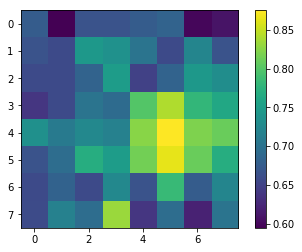

Should be: dry
['dry', 'pee']
[[0.95854795 0.04145202]]
Prediction: dry


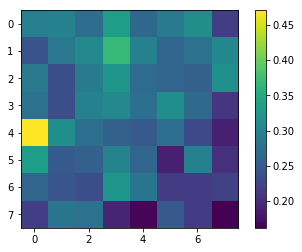

Should be: dry
['dry', 'pee']
[[0.9964084  0.00359153]]
Prediction: dry


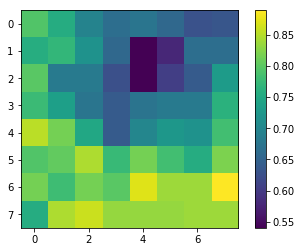

Should be: pee
['dry', 'pee']
[[0.00353717 0.9964629 ]]
Prediction: pee


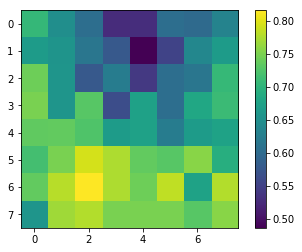

Should be: pee
['dry', 'pee']
[[0.01456215 0.98543787]]
Prediction: pee


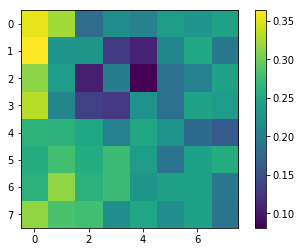

Should be: pee
['dry', 'pee']
[[0.00374935 0.9962507 ]]
Prediction: pee


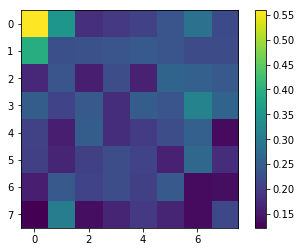

Should be: dry
['dry', 'pee']
[[0.24255115 0.75744885]]
Prediction: pee


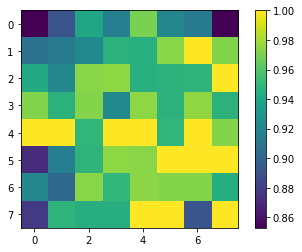

Should be: dry
['dry', 'pee']
[[0.9936552  0.00634481]]
Prediction: dry


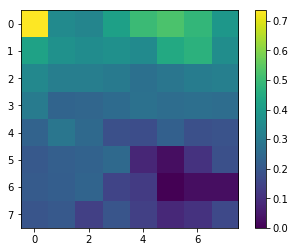

Should be: pee
['dry', 'pee']
[[5.2657974e-04 9.9947339e-01]]
Prediction: pee


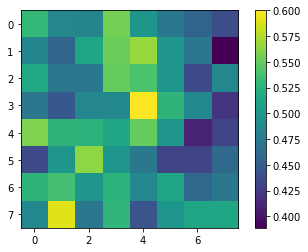

Should be: pee
['dry', 'pee']
[[0.09700959 0.90299034]]
Prediction: pee


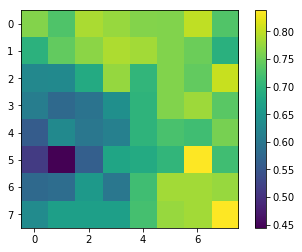

Should be: pee
['dry', 'pee']
[[0.01984525 0.9801547 ]]
Prediction: pee


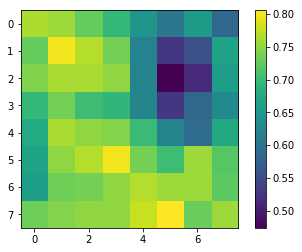

Should be: pee
['dry', 'pee']
[[0.00964979 0.9903502 ]]
Prediction: pee


In [12]:
import matplotlib.pyplot as plt


for i in range (0,11):
    image = X_test[i]
    pred = my_new_model.predict(X_test[i:i+1])
    
    plt.imshow(image.reshape((8,8)))
    plt.colorbar()
    plt.show()
    print("Should be: " + label_names[y_test[i]])
    print(label_names)
    print(pred)
    print("Prediction: " + label_names[pred.argmax()]) 
